# Linear regression

## Libraries and settings

In [67]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/DA_Project/Project/Minimum/5


## Import the apartment data

In [68]:
# Read data to pandas data frame
df_orig = pd.read_csv('bmw_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
                'model_raw',
                'Location',
                'PLZ',
                'Year',
                'price',
                'km',
                'luxury',
                'competition',
                'xDrive',
                'automat',
                'km_cat',
                'km_per_year',]
df = df_orig[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 2000) & 
            (df['price'] <= 100000)]

print(df.shape)
df.head(5)

(50, 19)


,id,web-scraper-start-url,text_raw,price_raw,model_raw,type_year_km_transmission_fuel,Location,PLZ,km_raw,Year,price,km,luxury,competition,xDrive,automat,km_cat,km_per_year,km_per_year_cat
0,1704481912-1,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 220 GRAN TOURER 220D XDRIVE GRAN TOURER ST...,CHF 21'000,220d xDrive Gran Tourer Steptronic,Occasion10.2017107.000 kmAutomatDiesel1299 (VD),VD,1299,107.0,2017,21000,107000,0,0,1,1,50-120k,15285.71,high
1,1704481912-2,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X5M X5M STEPTRONICCHF 38'500AB CHF 616 / M...,CHF 38'500,X5M Steptronic,Occasion08.2016171.000 kmAutomatBenzin8730 (SG),SG,8730,171.0,2016,38500,171000,0,0,0,1,120k+,21375.00,high
2,1704481912-3,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X3 X3 M40D INDIVIDUAL STEPTRONICCHF 44'990...,CHF 44'990,X3 M40d Individual Steptronic,Occasion12.201988.900 kmAutomatDiesel3178 (FR),FR,3178,88.9,2019,44990,88900,0,0,0,1,50-120k,17780.00,high
3,1704481912-4,https://www.comparis.ch/carfinder/marktplatz/b...,BMW X5 X5 XDRIVE 30D STEPTRONICCHF 26'500AB CH...,CHF 26'500,X5 xDrive 30d Steptronic,Occasion11.2016164.900 kmAutomatDiesel4461 (BL),BL,4461,164.9,2016,26500,164900,0,0,1,1,120k+,20612.50,high
4,1704481912-5,https://www.comparis.ch/carfinder/marktplatz/b...,BMW 320 320I CABRIOLET STEPTRONICCHF 16'750AB ...,CHF 16'750,320i Cabriolet Steptronic,Occasion06.201079.600 kmAutomatBenzin4461 (BL),BL,4461,79.6,2010,16750,79600,0,0,0,1,50-120k,5685.71,low


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [69]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['km'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
12     88900
4      79600
37    250000
8      59900
3     164900
Name: km, dtype: int64 

y_train:
12    44990
4     16750
37     8900
8     63890
3     26500
Name: price, dtype: int64


### Fit the simple linear regression model

In [70]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            44674.79
Slope of regression line (beta):          -0.121
p-value:                                  0.0020
R-squared (coefficient of determination): 0.2241


### Plot regression line

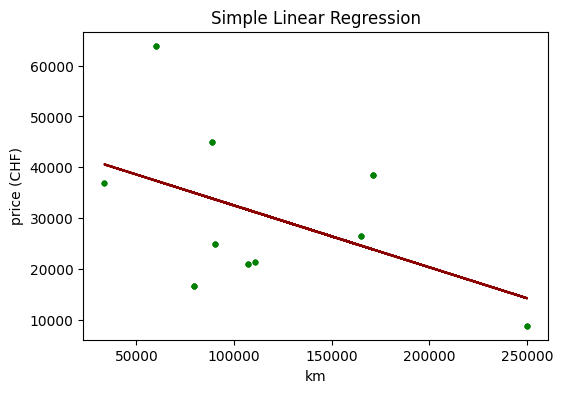

In [71]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('km')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [72]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 33874.08
1st Observed price in dataset: 21000.00
1st Residual price in dataset: -12874.08


### Plot histogram of residuals

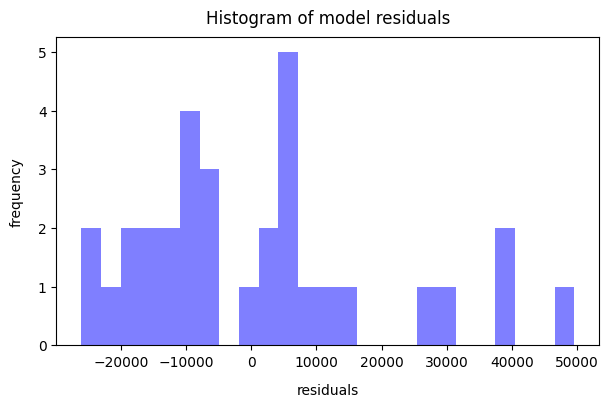

In [73]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [74]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted.iloc[i]:.1f}')

Observed price: 26500.0, Predicted price: 24640.6
Observed price: 36990.0, Predicted price: 40592.6
Observed price: 21000.0, Predicted price: 31675.1
Observed price: 21500.0, Predicted price: 31225.5
Observed price: 8900.0, Predicted price: 14301.6
Observed price: 63890.0, Predicted price: 37397.4
Observed price: 24900.0, Predicted price: 33728.3
Observed price: 21500.0, Predicted price: 31225.5
Observed price: 44990.0, Predicted price: 33874.1
Observed price: 36990.0, Predicted price: 40592.6


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [75]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['km',
                                                            'Year']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
        km  Year
12   88900  2019
4    79600  2010
37  250000  2007
8    59900  2019
3   164900  2016 

y2_train:
12    44990
4     16750
37     8900
8     63890
3     26500
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [76]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     24.96
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.37e-07
Time:                        14:32:33   Log-Likelihood:                -425.07
No. Observations:                  40   AIC:                             856.1
Df Residuals:                      37   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.807e+06   1.06e+06     -5.476      0.0

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

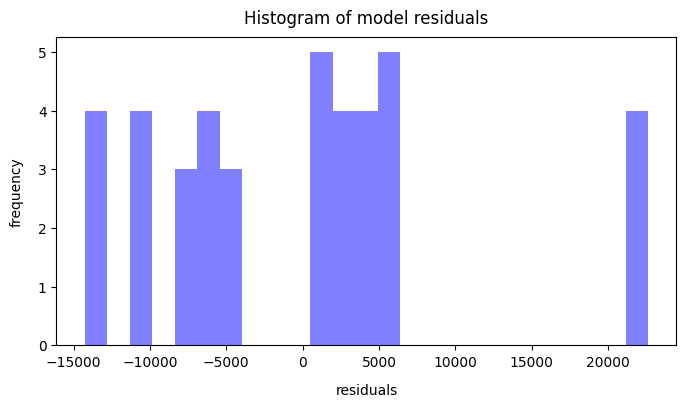

In [77]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [78]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 26500.0, Predicted price: 32159.7
Observed price: 36990.0, Predicted price: 44250.4
Observed price: 21000.0, Predicted price: 35278.6
Observed price: 21500.0, Predicted price: 26574.1
Observed price: 8900.0, Predicted price: 5762.4
Observed price: 63890.0, Predicted price: 41252.7
Observed price: 24900.0, Predicted price: 35343.4
Observed price: 21500.0, Predicted price: 26574.1
Observed price: 44990.0, Predicted price: 41141.5
Observed price: 36990.0, Predicted price: 44250.4


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [79]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-12 14:32:33
Python Version: 3.10.13
-----------------------------------
